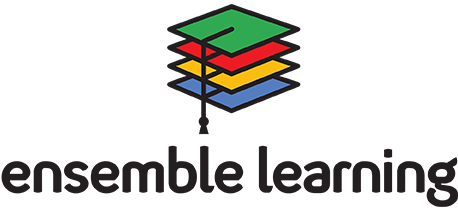

## Table of Content

1. [Introduction to Ensemble Learning](#section1)<br>
    - 1.1 [Implementation of Algorithm Using Python](#section101)<br>
    - 1.2 [Advantages and Disadvantages](#section102)<br>
2. [Use Case : Wisconsin Breast Cancer](#section2)<br>
3. [Data loading and description](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Modelling and Prediction](#section5)<br>
6. [Conclusion](#section6)

## Introduction

When you want to purchase some new laptop, will you walk up to the first shop and an purchase one based on the advice of the dealer there? It's highly unlikely.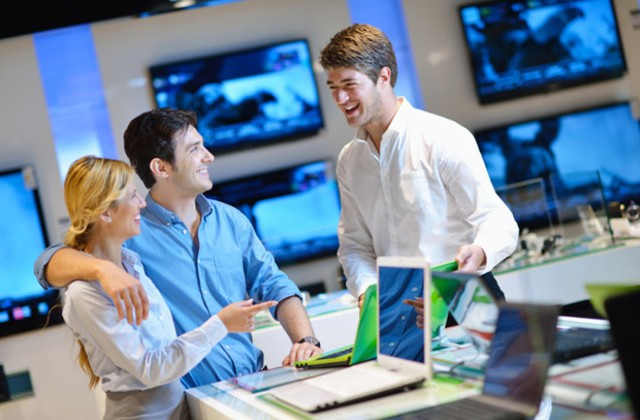 <br/>
- You would __likely browse__ a few __web portals__ where people have posted their reviews and compare different laptop models, checking for their __features__, __speciifcations__ and __prices__.<br>
- You will also probably __ask__ your __friends and colleagues__ for their opinion. <br>
- In short, you wouldn’t directly reach a conclusion, but will instead make a decision __considering the opinions__ of other people as well.

The objective of this notebook is to introduce the concept of __ensemble learning__ and understand the __algorithms__ which use this __technique__.

__Ensemble Learning__ : An ensemble is itself a __supervised learning algorithm__, becuase it can be __trained__ and then used to __make predictions__.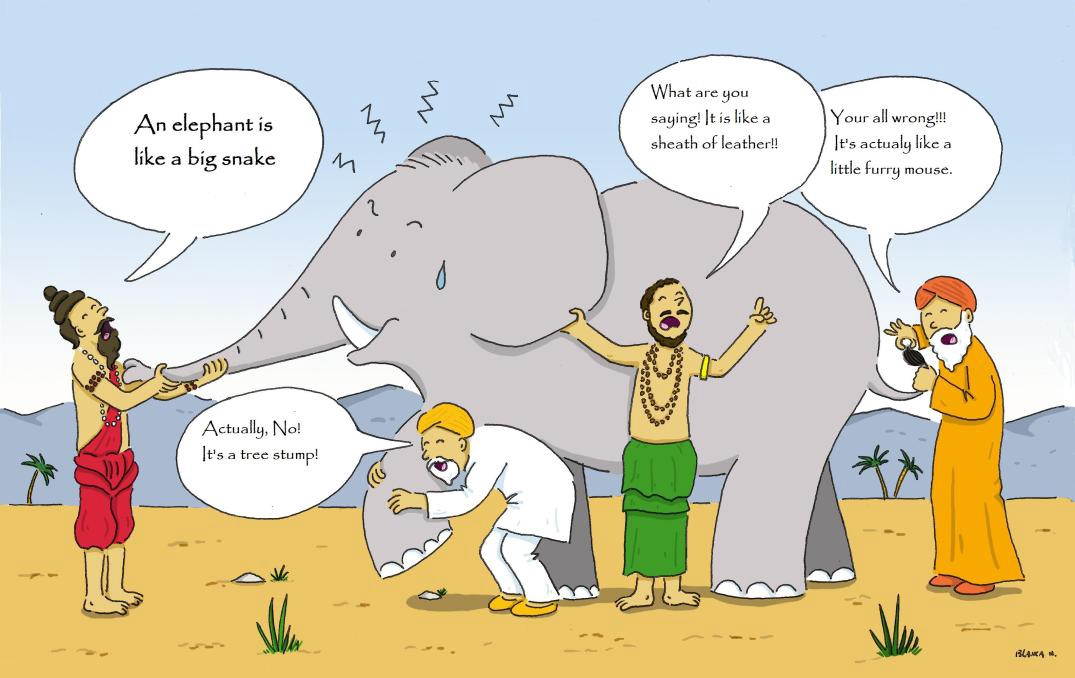

Another way to think about Ensemble learning is __Fable of blind men and elephant__. 
- All of the blind men had their own description of the elephant. 
- Even though each of the description was true, it would have been better to come together and discuss their undertanding before coming to final conclusion. 
- This story perfectly describes the Ensemble learning method.

__Ensemble Algorithm__ : The _goal_ of ensemble algorithms is to __combine__ the __predictions of several base estimators__ built with a given learning algorithm in order to __improve robustness__ over a single estimator`.

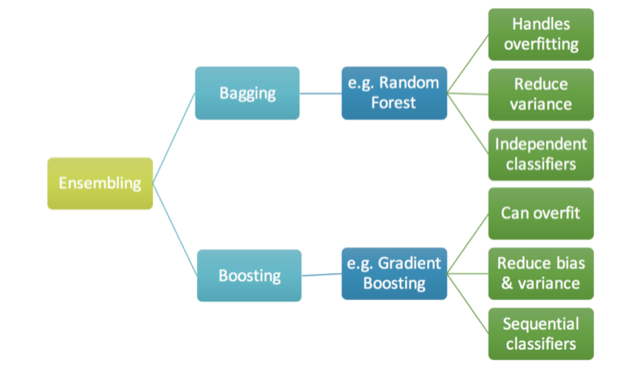

There are two families of ensemble methods which are usually distinguished:<br><br>
1. __Averaging Method__ : The driving principle is to build a several estimators independetly and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.<br>
__Examples__: Bagging methods, Forests of randomized trees<br><br>

2. __Boosting Methods__ : Base estimators are built sequentially and one tries to reduce the bias of combined estimator. This motivation is to combine several weak models to produce a powerful ensemble.<br>
__Examples__: AdaBoost, Gradient Tree Boosting

Two most popular ensemble methods are __bagging__ and __boosting__<br><br>
- __Bagging__: Training a bunch of individual models in a __parallel__ way. Each model is trained by a random subset of the data.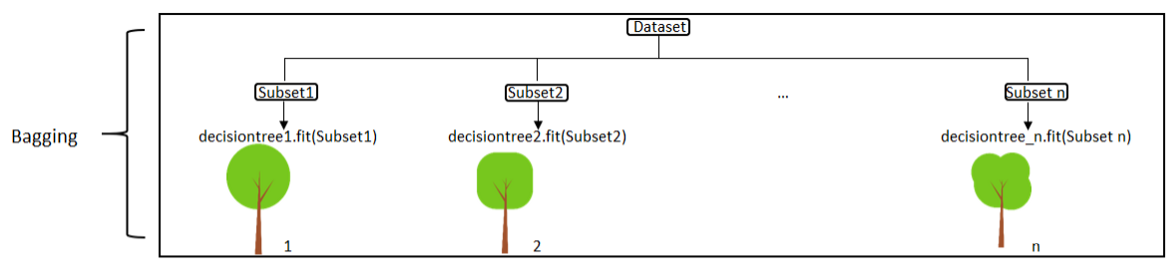

- __Boosting__: Training a bunch of individual models in a __sequential__ way. Each individual model learns from mistakes made by the previous model.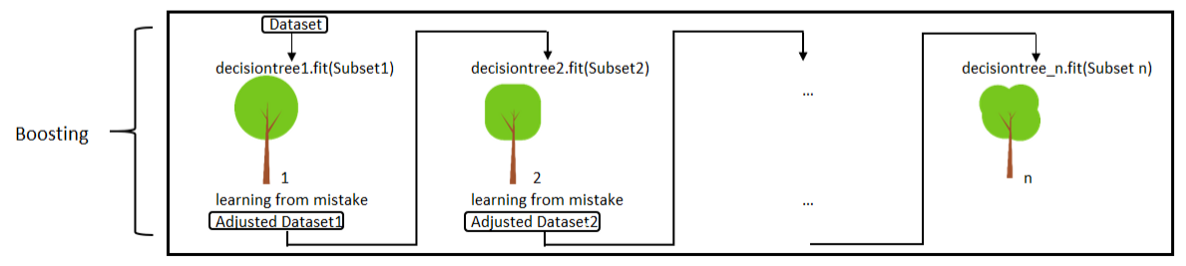

## Lets dive deep into implementation of algorithm using Python sklearn.
### RANDOM FOREST

__Random forest__ is a model using __bagging__ as the ensemble method and __decision tree as the individual model__.<br>
Let's take a look at the __magic of randomness__

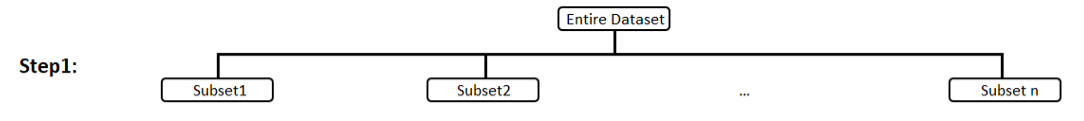
Select __n (e.g. 1000) random subsets__ from the training set

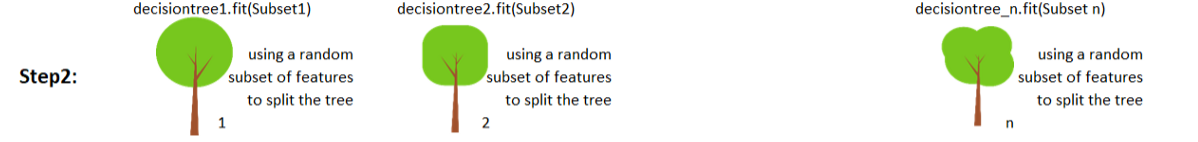
__Train n (e.g. 1000) decision trees__

- one random subset is used to train one decision tree<br><br>
- the optimal splits for each decision tree are based on a random subset of features (e.g. 10 features in total, randomly select 5 out of 10 features to split)

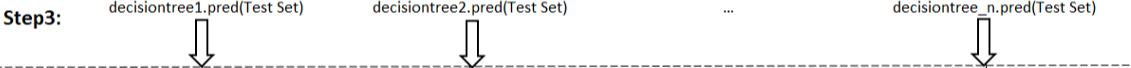<br>
__Each individual tree__ predicts the records/candidates in the test set, independently.

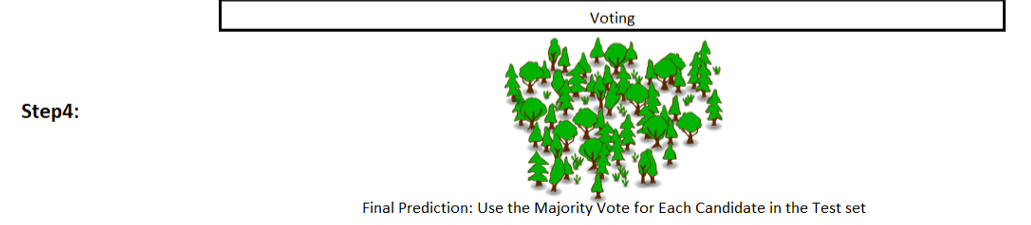<br>
 __Make the final prediction__

For each candidate in the test set, Random Forest uses the class (e.g. cat or dog) with the __majority vote__ as this candidate’s final prediction.

Of course, our 1000 trees are the parliament here.

### ADABOOST (ADAPTIVE BOOSTING)

- AdaBoost is a boosting model and works especially well with the decision tree. 
- Boosting model’s key is learning from the previous mistakes, e.g. misclassification data points.

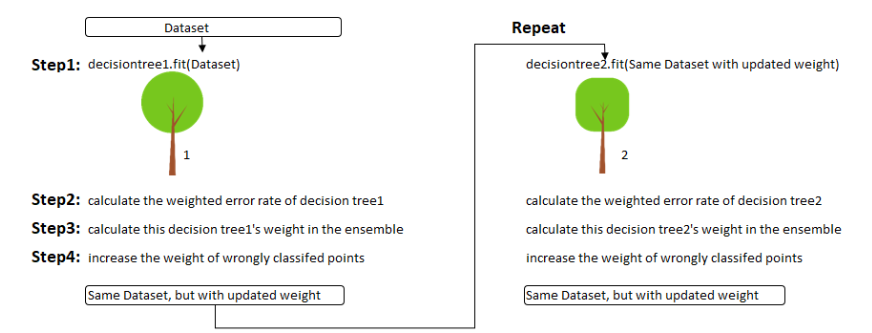

__Step 0__: __Initialize the weights__ of data points. if the training set has __100__ data points, then __each point’s__ initial weight should be __1/100 = 0.01__.

__Step 1__: __Train__ a decision tree

__Step 2__: 
- __Calculate the weighted error rate (e)__ of the decision tree. 
- The weighted error rate (e) is just __how many wrong predictions__ out of total and you treat the wrong predictions differently based on its data point’s weight. 
- __The higher the weight, the more the corresponding error will be weighted__ during the calculation of the (e).

__Step 3__: 
- __Calculate this decision tree’s weight__ in the ensemble

- The weight of this tree = learning rate * log( (1 — e) / e)

- The __higher weighted error__ rate of a tree, 😫, the __less decision power__ the tree will be given during the later voting and 😃 vice versa.

__Step 4__: 
- __Update weights__ of wrongly classified points

The weight of each data point =

    - if the model got this data point correct, the weight stays the same
    - if the model got this data point wrong, the new weight of this point = old weight * np.exp(weight of this tree)
__Note__: 
- The __higher the weight__ of the tree (more accurate this tree performs), the __more boost__ (importance) the misclassified data point by this tree will get. 
- The weights of the data points are __normalized after all the misclassified points are updated__.

__Step 5__: __Repeat__ Step 1(until the number of trees we set to train is reached)<br>

__Step 6__: __Make the final prediction__

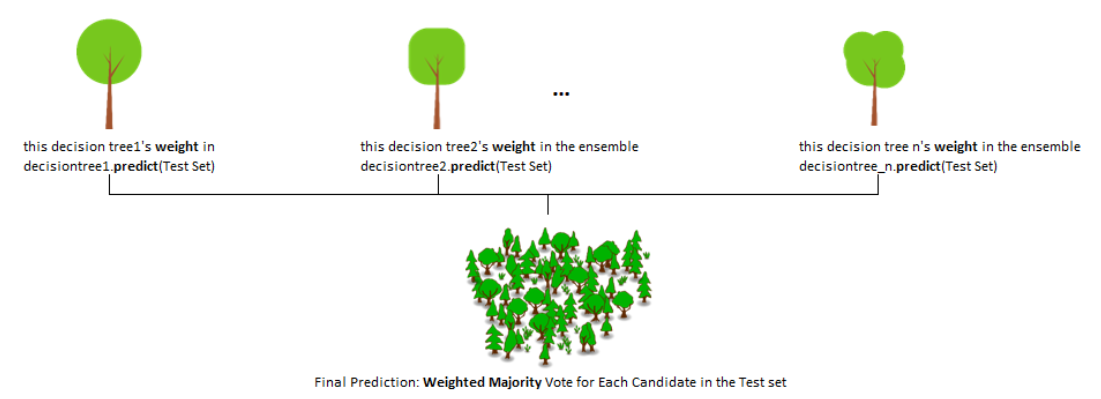<br>

- The tree with __higher weight__ will have __more power of influence__ on the final decision.

### GRADIENT BOOSTING

Boosting model's __key is learning from previous mistakes__.<br><br>
Gradient Boosting learns from the mistake - __residual error directly__, rather than update the weights of data points

Let's see __how Gradient Boosting works__:<br>
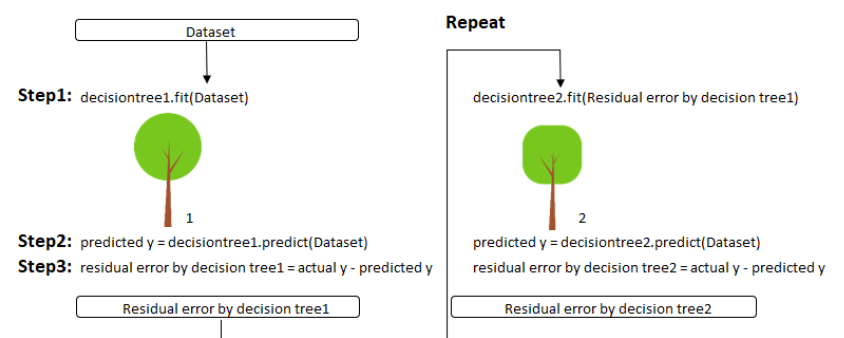

__Step 1__: 
__Train__ a decision tree

__Step 2__: 
__Apply__ the decision tree just trained to predict

__Step 3__: 
__Calculate__ the residual of this decision tree, Save residual errors as the new y

__Step 4__: 
__Repeat__ Step 1 (until the number of trees we set to train is reached)

__Step 5__: 
__Make the final prediction__

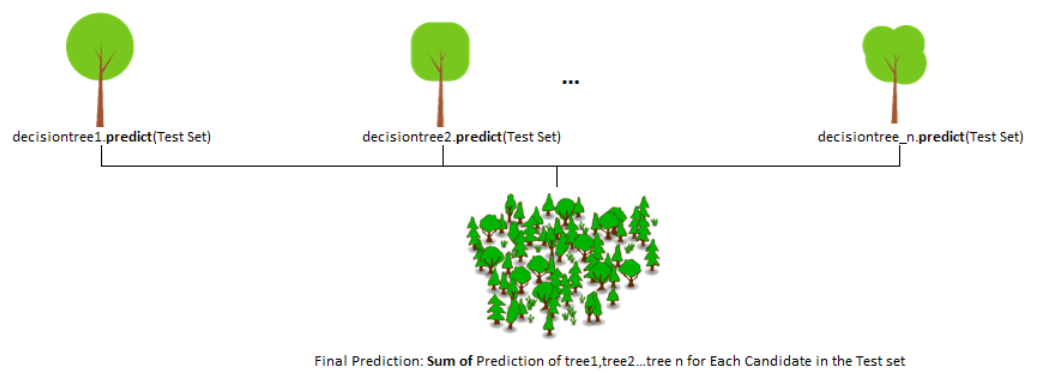<br>
The Gradient Boosting makes a __new prediction by simply adding up the predictions__(of all trees).

## Advantages of Ensemble Algorithm:

- Ensemble is a proven method for __improving the accuracy__ of the model and works in most of the cases.

- Ensemble makes the model more __robust__ and __stable__ thus entering decent performance on the test cases in more scenarios.

- You can ensemble to capture __linear__ and simple as well __non-linear__ complex relationships in the data. 
- This can be done by using __two different models__ and forming an __ensemble of two__.

## Disadvantages of Ensemble Algorithm:

- Ensemble __reduce the model interpret-ability__ and makes it very difficult to draw any crucial business insights at the end.

- It is __time-consuming__ and thus might not be the best idea for real-time applications.

- The __selection of models__ for creating an ensemble is an __art__ which is really hard to master

## Use Case: Winconsin Breast Cancer Data


1. Number of Attributes: 10 plus the class attribute

2. Attribute Information: (class attribute has been moved to last column)


----------------------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                       1 - 10
   11. Class:                        2 for benign, 4 for malignant

----------------------------------------------------

3. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

4. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)


### Data PreProcessing

### Importing packages

In [1]:
import numpy as np
import pandas as pd
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import Imputer

# To supress all the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

# Importing the parallel_coordinates from pandas.plotting which will help in plotting the Parallel Coordinates.

from pandas.plotting import parallel_coordinates
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade
# Install chart_studio, please use this command. 

!pip install chart-studio


In [3]:
#data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', 
 #                  names=['Sample code number', 'Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin', 'Normal Nucleoli', 'Mitosis','Class'])
data = pd.read_csv("D:\\Training'\\eKeeda\\Rawdata\\breast-cancer-wisconsin.csv", 
                   names=['Sample code number', 'Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin', 'Normal Nucleoli', 'Mitosis','Class'])
    
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
type(data)

pandas.core.frame.DataFrame

#### Observation
The column "Sample code number" is just an indicator and it is of no use in the modelling. So we will drop it

In [5]:
data.drop(['Sample code number'], axis=1, inplace = True)
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


<AxesSubplot:>

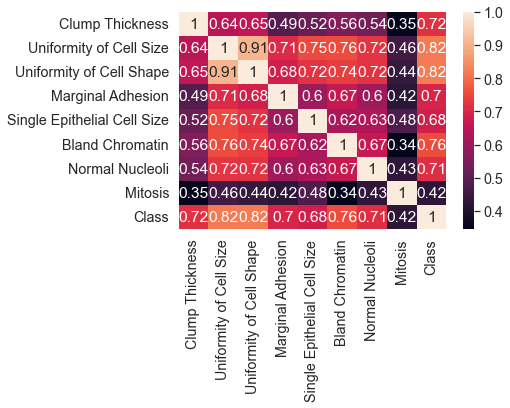

In [6]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

### Checking descriptive statistics

In [7]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitosis,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


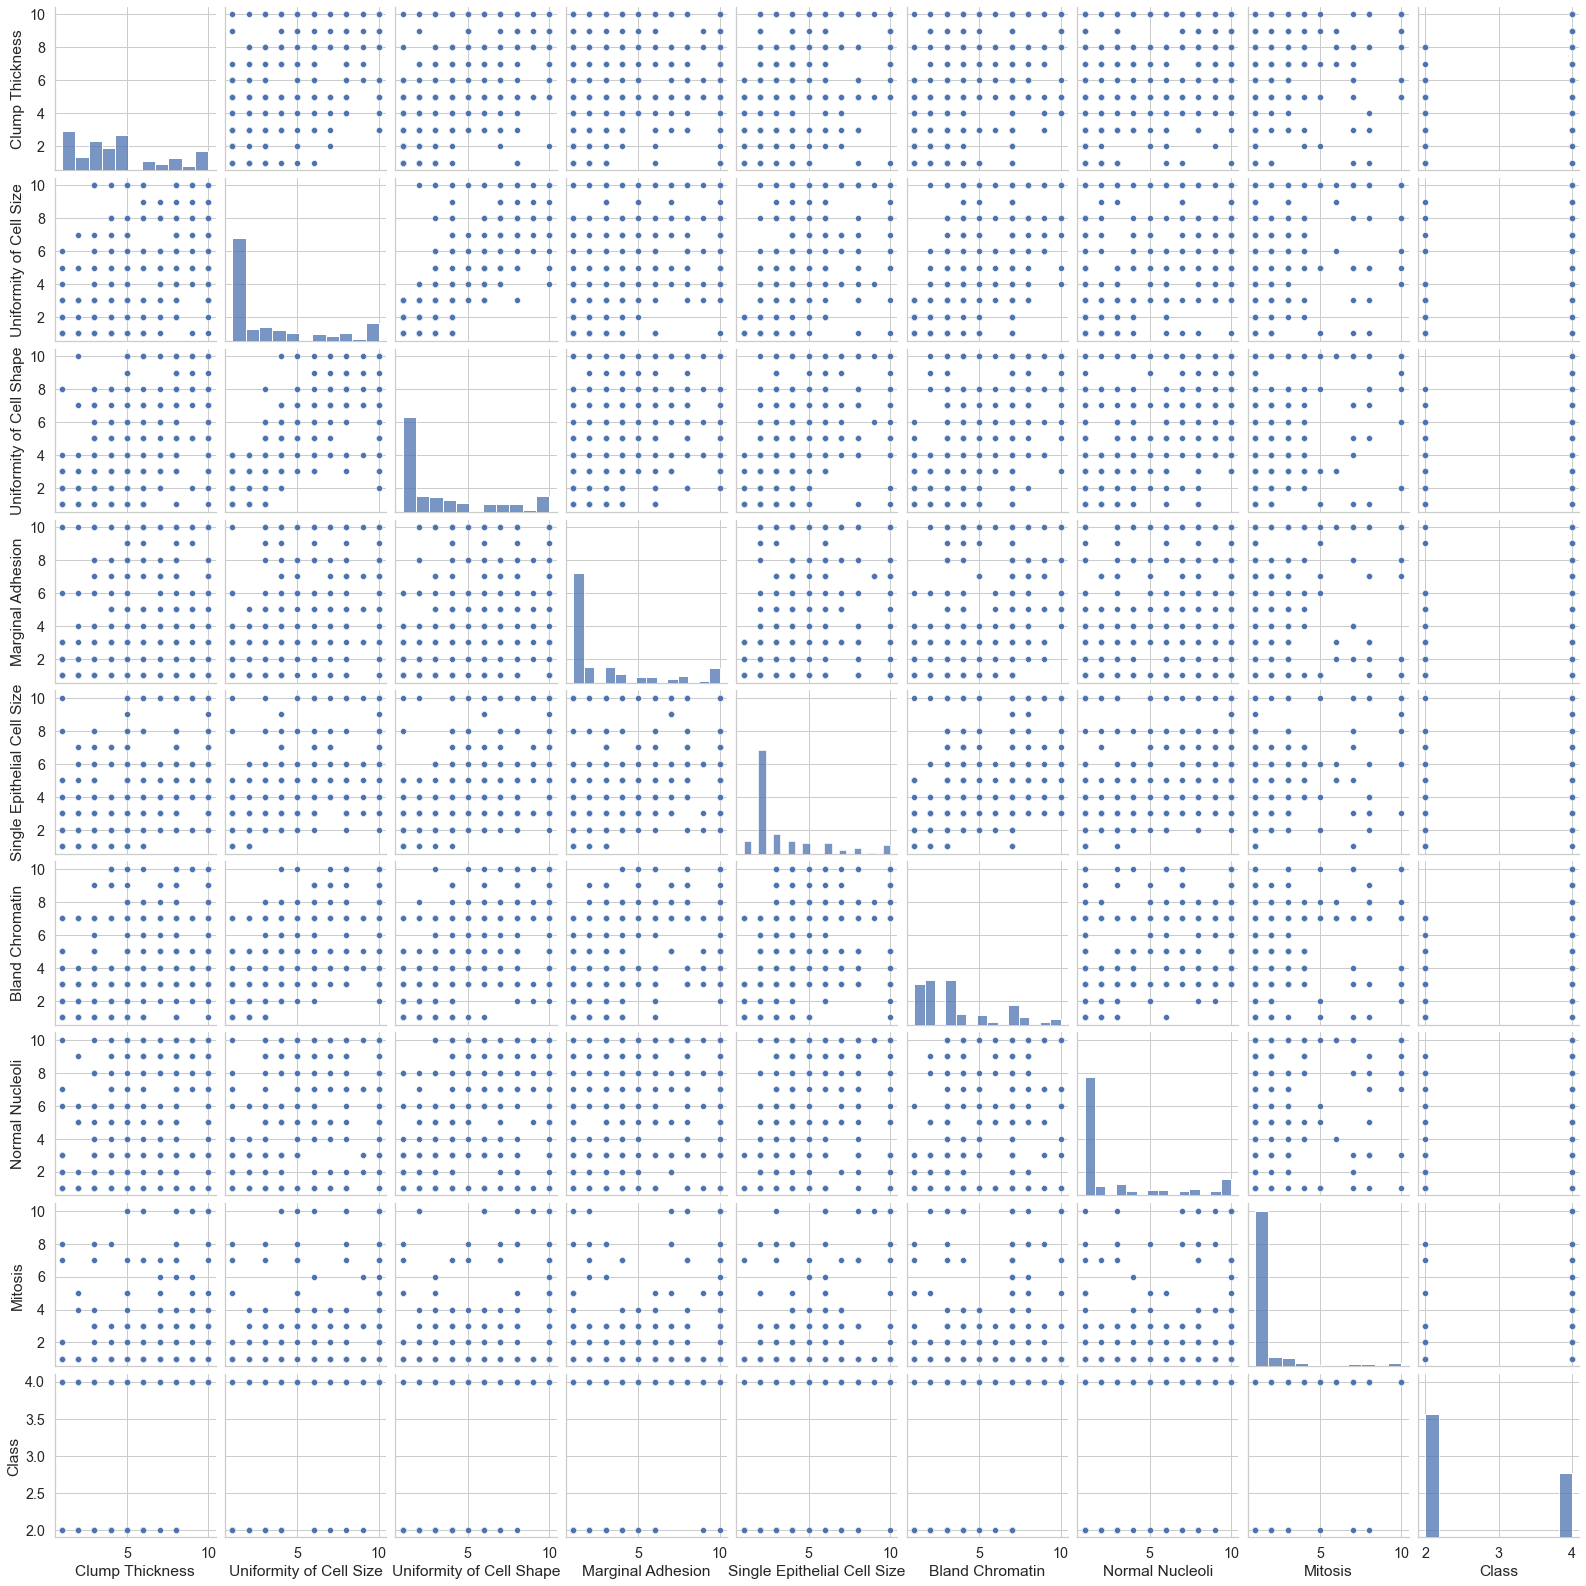

In [8]:
import seaborn as sns
sns.pairplot( data)

### Checking data info

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitosis                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


### Exploratory Data Analysis

In [10]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitosis                        0
Class                          0
dtype: int64

The dataset contains some missing values in the column named "Bare Nuclei". 
Let's do a check and impute the missing values.

In [11]:
#unique(data['Bare Nuclei'])
data['Bare Nuclei'].value_counts() 

1     402
10    132
2     30 
5     30 
3     28 
8     21 
4     19 
?     16 
9     9  
7     8  
6     4  
Name: Bare Nuclei, dtype: int64

We can see there is '?' in it. <br>
    First replace it with 1

In [12]:
data.replace('?', '1', inplace = True)

In [13]:
data['Bare Nuclei'].value_counts() 

1     418
10    132
2     30 
5     30 
3     28 
8     21 
4     19 
9     9  
7     8  
6     4  
Name: Bare Nuclei, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitosis                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [15]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int64')

In [16]:
data['Class'].replace(2, 0, inplace = True) # Bening Tumor Cell >> Non Cancerous
data['Class'].replace(4, 1, inplace = True)# Malignant Tumor Cell > Cancerous

In [17]:
data['Class'].value_counts() 

0    458
1    241
Name: Class, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitosis                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


### Missing Value treatment

In [19]:
#Ignore Missing value treatment as the dataset doesnot demand this.
# # We will need to convert the datafraame to numpy array otherwise won't be able to impute
# values = data.values

# # Impute the value
# imputer = Imputer()
# imputedData = imputer.fit_transform(values)

On having a close look at the data, we can see that all the ranges of the features of the datset are not the same.<br>
This may cause problem as small change in a feature might not affect the other.<br>
In this case, we will need to normalize the range of the features to a uniform range.

In [20]:
#Ignore Min Max Scaler as the dataset doesnot demand this.
# scaler = MinMaxScaler(feature_range=(0,1))
# normalizedData = scaler.fit_transform(imputedData)

### EDA Continued.
    

In [21]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Text(0.5, 1.0, 'KDE plot showing the density of Clump Thickness values')

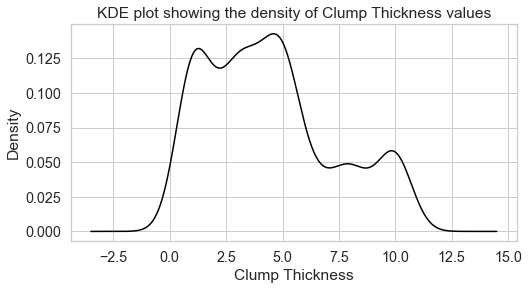

In [22]:

data['Clump Thickness'].plot(kind='kde', figsize=(8,4), color='black')

plt.xlabel('Clump Thickness')
plt.ylabel('Density')
plt.title('KDE plot showing the density of Clump Thickness values')

<AxesSubplot:xlabel='Mitosis', ylabel='Density'>

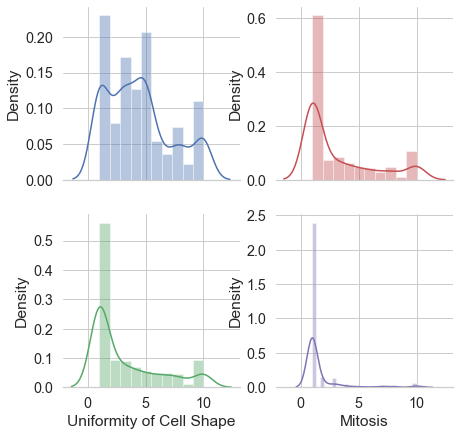

In [23]:
f, axes = plt.subplots(2,2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data['Clump Thickness'], color="b", ax=axes[0, 0])

sns.distplot(data['Uniformity of Cell Size'], color="r", ax=axes[0, 1])

sns.distplot(data['Uniformity of Cell Shape'], color="g", ax=axes[1, 0])

sns.distplot(data['Mitosis'], color="m", ax=axes[1, 1])

In [24]:
data.drop(['Uniformity of Cell Shape'], axis=1, inplace = True)
data.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,5,1,1,2,1,3,1,1,0
1,5,4,5,7,10,3,2,1,0
2,3,1,1,2,2,3,1,1,0
3,6,8,1,3,4,3,7,1,0
4,4,1,3,2,1,3,1,1,0


Text(0.5, 1.0, 'KDE plot showing the density of Bare Nuclei values')

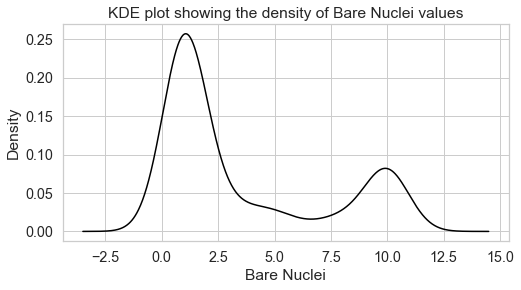

In [25]:
data['Bare Nuclei'].plot(kind='kde', figsize=(8,4), color='black')

plt.xlabel('Bare Nuclei')
plt.ylabel('Density')
plt.title('KDE plot showing the density of Bare Nuclei values')

Now done with all the pre processing of the data and will start with Bagging based Ensembling.<br> In this case, we are using __Bagged Decision Tree__

Text(0.5, 1.0, 'Bare Nuclei vs Class')

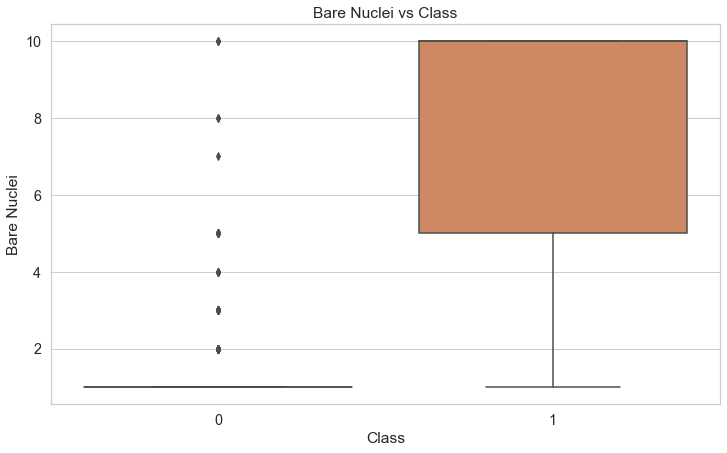

In [26]:
#Box Plot

plt.figure(figsize=(12,7))
sns.boxplot(data=data, x='Class', y='Bare Nuclei')

plt.title('Bare Nuclei vs Class')

Observation from the above Box Plot:
All the samples having benign tumor have Bare Nuclei =1, with outliers ranging from 2 to 10.
Most of the Samples having Bare Nuclei >5 are a candidate of Malignant Tumor.


In [27]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Text(0.5, 1.0, 'Marginal Adhesion vs Class')

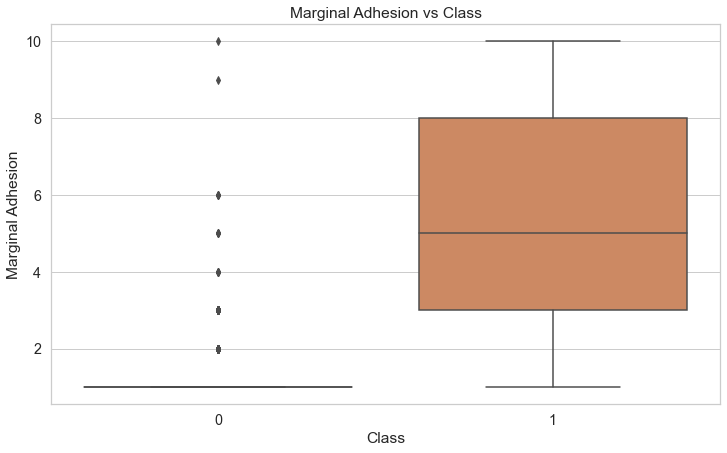

In [28]:
#Box Plot

plt.figure(figsize=(12,7))
sns.boxplot(data=data, x='Class', y='Marginal Adhesion')

plt.title('Marginal Adhesion vs Class')

In [29]:
# Draw Histogram, Paralal Coordinates, Pieplot, Violin Plot, strip plot >> Plot as many of them as per the demand of tha data set.
# Can we drop any further columns.
# Do we need to perform any type of standardization
# are there any categorical variables >> We need to perform one hot enconding or use label encoder.
#Check for the condition if the data set is ready to perform train test split ( autocorelation, covariance, e.t.c)

In [30]:
# Bagged Decison Tress for Classification - necessary dependencies

from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier

### Segregate the features from the labels

In [31]:
Y = data.pop('Class')

In [32]:
Y.head(1)

0    0
Name: Class, dtype: int64

In [33]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [34]:
#homework - do a train test split and change to algo below to incprporate that.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.20, random_state=1)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_test = dtc.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('Recall score for test data is:', recall_score(y_test,y_pred_test))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
print('Precision score for test data is:', precision_score(y_test,y_pred_test))

Recall score for test data is: 0.7708333333333334
Accuracy score for test data is: 0.9214285714285714
Precision score for test data is: 1.0


In [37]:
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
num_est=7



model = BaggingClassifier(base_estimator=dtc, n_estimators=num_est, max_samples= .60 ,random_state=7) #random - starts with a 'seed'
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

from sklearn.metrics import recall_score
print('Recall score for test data is:', recall_score(y_test,y_pred_test))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
print('Precision score for test data is:', precision_score(y_test,y_pred_test))
    


#y_pred_new = model.predict(X_new)

Recall score for test data is: 0.8333333333333334
Accuracy score for test data is: 0.9214285714285714
Precision score for test data is: 0.9302325581395349


In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=num_est, max_samples= .60 ,random_state=7) #random - starts with a 'seed'
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

from sklearn.metrics import recall_score
print('Recall score for test data is:', recall_score(y_test,y_pred_test))

Recall score for test data is: 0.8958333333333334


## Implementing Bagging Classifier
For reference to BaggingClassifier, please refer this link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html<br>
__base_estimator__: The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a decision tree.<br>
__n_estimator__: The number of base estimators in the ensemble.<br>
__random_state__: 
- If int, random_state is the seed used by the random number generator.
- If RandomState instance, random_state is the random number generator. 
- If None, the random number generator is the RandomState instance used by np.random.

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
 #= model_selection.KFold(n_splits=10, random_state=7) # change this during train-test split method
#cart = DecisionTreeClassifier()
num_est = 100

model = BaggingClassifier(base_estimator=logreg, n_estimators=num_est, random_state=7)

results = model_selection.cross_val_score(model, data, Y, cv=kfold)
print(results.mean())
print(results.std())

0.9656521739130437
0.026516792998867614


In [40]:
cart = DecisionTreeClassifier()

kfold = model_selection.KFold(n_splits=7, shuffle=True, random_state=7)

num_est =120
model = BaggingClassifier(base_estimator=cart, n_estimators=num_est, random_state=7)
results = model_selection.cross_val_score(model, data, Y, cv=kfold)
print(results.mean())

0.9527561327561328


## Implementing AdaBoost Classifier

For reference to AdaBoostClassifier, please refer this link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

__n_estimators__: The maximum number of estimators at which __boosting is terminated__. _In case of perfect fit, the learning procedure is stopped early._<br><br>
__random_state__: 
- If int, random_state is the seed used by the random number generator.
- If RandomState instance, random_state is the random number generator. 
- If None, the random number generator is the RandomState instance used by np.random.

In [41]:
from sklearn.ensemble import AdaBoostClassifier
seed=7
num_trees=50
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)

model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=num_trees)
results = model_selection.cross_val_score(model, data, Y, cv=kfold)
print(results.mean())
print(results)


# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# from sklearn import metrics
# metrics.accuracy_score(y_test,y_pred)


0.9613664596273293
[0.9571 0.9714 0.9571 0.9286 1.     0.9571 0.9857 0.9714 0.9286 0.9565]


In [42]:
results

array([0.9571, 0.9714, 0.9571, 0.9286, 1.    , 0.9571, 0.9857, 0.9714,
       0.9286, 0.9565])

## Implementing Gradient Boost Classifier

For reference to Gradient Boost Classifier, please refer this link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

__n_estimators__: The maximum number of estimators at which __boosting is terminated__. _In case of perfect fit, the learning procedure is stopped early._<br><br>
__learning_rate__: 
(default=0.1)
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.<br><br>
__subsample__: 
(default=1.0)
The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in <b>Stochastic</b> Gradient Boosting. Subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
seed=7
num_trees=100
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed, learning_rate = 0.10) #usually is less than 0.1
results = model_selection.cross_val_score(model, data, Y, cv=kfold)
print(results.mean())

#.fit(Xtrain, ytrain)
#.predict(Xtest) methods

0.9656107660455486


## Implementing XG Boost Classifier

For reference to XGBoost Classifier, please refer this link: https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn


In [46]:
import sys

!{sys.executable} -m pip install xgboost


ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [47]:
import xgboost as xgb

seed=7
num_trees=100
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
XGB = xgb.XGBClassifier(n_estimators=num_trees, random_state=seed, learning_rate = 0.15)
results = model_selection.cross_val_score(XGB, data, Y, cv=kfold)
print(results.mean())

0.959896480331263
